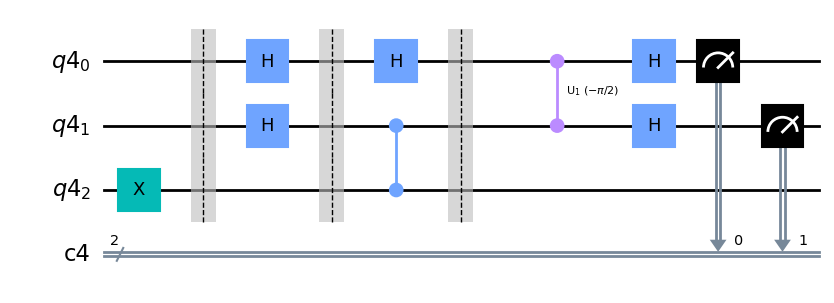

In [5]:
'''
    Quantum Phase Estimation

    Problem. Given an unitary operator U, estimate θ in U|ψ>=exp(2πiθ)|ψ>.

'''
import math

from qiskit import IBMQ, BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute


def qft_dagger(circuit, q, n):
    for j in range(n):
        k = (n-1) - j
        for m in range(k):
            circuit.cu1(-math.pi/float(2**(k-m)), q[k], q[m])
        circuit.h(q[k])


qr = QuantumRegister(3)  # Initialize qubits
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)

# Prepare |ψ> = 1
circuit.x(qr[2])

circuit.barrier()

# Apply Hadamard to ancilla qubits
circuit.h(qr[0])
circuit.h(qr[1])

circuit.barrier()

# Controlled unitary operations
circuit.h(qr[0])
circuit.cz(qr[1], qr[2])

circuit.barrier()

# Apply inverse quantum Fourier transform and measure ancilla qubits
qft_dagger(circuit, qr, 2)

circuit.measure(qr[0], cr[0])
circuit.measure(qr[1], cr[1])

circuit.draw('mpl')
# Run our circuit with local simulator
# backend = BasicAer.get_backend('qasm_simulator')
# shots = 1024
# results = execute(circuit, backend=backend, shots=shots).result()
# answer = results.get_counts()
# print(answer)